# Take Home

### Importing required libraries

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.tsa.seasonal          import seasonal_decompose, STL
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Read retail turnover data 

In [ ]:
df = pd.read_csv('RetailTurnover.csv')
df.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [ ]:
df.tail()

,Year,Quarter,Turnover
34,1991,Q1,17115.2
35,1991,Q2,14284.9
36,1991,Q3,14558.8
37,1991,Q4,14914.3
38,1992,Q1,17342.3


In [ ]:
quarters= pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')

In [ ]:
df['Time_Stamp']=pd.DataFrame(quarters)
df.drop(['Year','Quarter'],axis=1,inplace=True)
df=df.set_index('Time_Stamp')

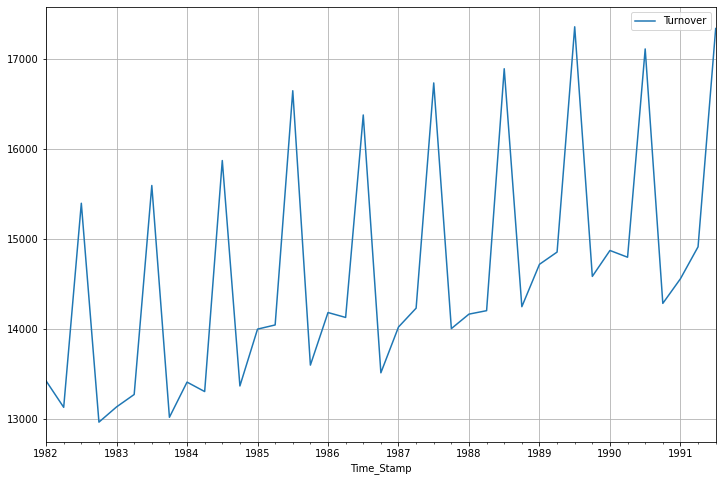

In [ ]:
rcParams['figure.figsize'] = 12,8
df.plot(grid=True);

# Decompose the series to identify trends and seasonality

In [ ]:
decompose=STL(df).fit()

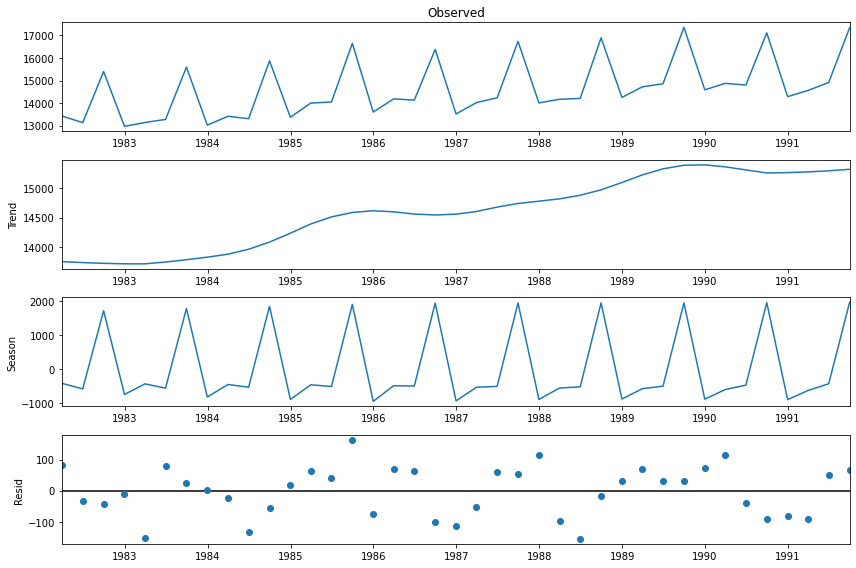

In [ ]:
decompose.plot();

## Split the time series data into training and testing sets

In [ ]:
df.head()

,Turnover
Time_Stamp,
1982-03-31,13423.2
1982-06-30,13128.8
1982-09-30,15398.8
1982-12-31,12964.2
1983-03-31,13133.5


In [ ]:
df.tail()

,Turnover
Time_Stamp,
1990-09-30,17115.2
1990-12-31,14284.9
1991-03-31,14558.8
1991-06-30,14914.3
1991-09-30,17342.3


In [ ]:
train_end=datetime(1988,9,30)
test_end=datetime(1991,9,30)

In [ ]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

# Based on the trend and seasonality apply the Smoothing technique

In [ ]:
model_TES = ExponentialSmoothing(train,trend='multiplicative',seasonal='additive',initialization_method='estimated')

In [ ]:
model_TES = model_TES.fit(optimized=True)

In [ ]:
model_TES.summary()

Dep. Variable:,Turnover,No. Observations:,27
Model:,ExponentialSmoothing,SSE,890121.097
Optimized:,True,AIC,296.888
Trend:,Multiplicative,BIC,307.255
Seasonal:,Additive,AICC,310.638
Seasonal Periods:,4,Date:,"Fri, 05 Mar 2021"
Box-Cox:,False,Time:,09:56:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6060714,alpha,True
smoothing_trend,0.0001,beta,True


#### training the model

In [ ]:
model_TES = model_TES.fit(smoothing_level=0.60, smoothing_trend=0.0001, smoothing_seasonal=0.0001,optimized=True)

#### predicting forecast

In [ ]:
TES_add_predict =  model_TES.forecast(len(test))

#### lets plot foecast results for SES, DES and H-W model

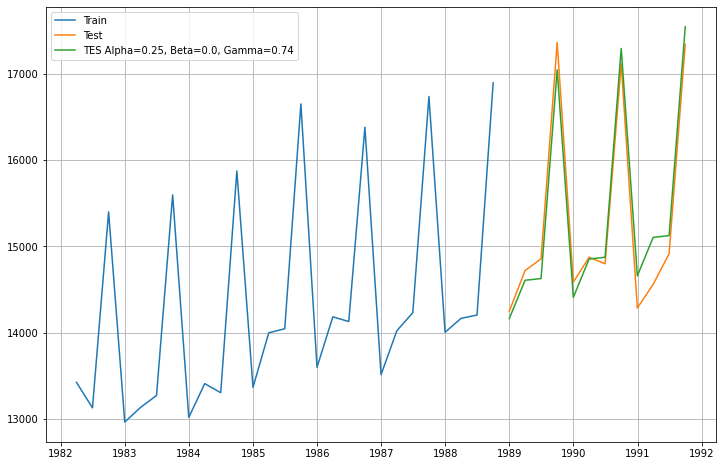

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_add_predict, label='TES Alpha=0.25, Beta=0.0, Gamma=0.74')
plt.legend(loc='best')
plt.grid()

# Find MAPE for your Model

#### Defining Mean Absolute Percentage error

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [ ]:
MAPE(test.values,TES_add_predict.values)

7.439963440901981